# Task5

In [1]:
from src.task5 import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# parameters
random_state = 12345
t_0 = 0
t_end = 1000
NT = t_end-t_0
# if these error tolerances are set too high, the solution will be qualitatively (!) wrong
rtol=1e-8
atol=1e-8

# SIR model parameters
beta=11.5
A=20
d=0.1
nu=1
b=0.01 # try to set this to 0.01, 0.020, ..., 0.022, ..., 0.03
mu0 = 10   # minimum recovery rate
mu1 = 10.45  # maximum recovery rate

Reproduction number R0= 0.9956709956709958
Globally asymptotically stable if beta <=d+nu+mu0. This is False


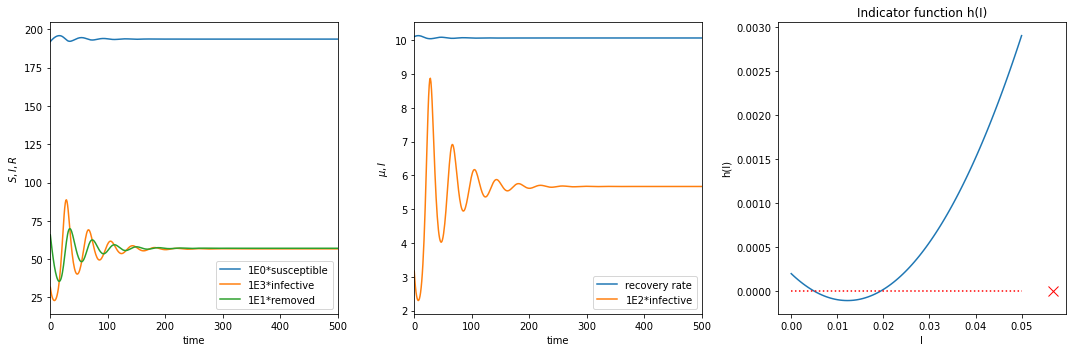

In [3]:
rng = np.random.default_rng(random_state)
SIM0 = rng.uniform(low=(190, 0, 1), high=(199, 0.1, 8), size=(3,))
sir_plots(random_state, t_0, t_end, rtol, atol, beta, A, d, nu, b, mu0, mu1, SIM0)

0.04116243794931012
[0.01121721 0.04088297]
Hopf Bifurcation happened at 0.022
Reproduction number R0= 0.9956709956709958
Globally asymptotically stable if beta <=d+nu+mu0. This is False


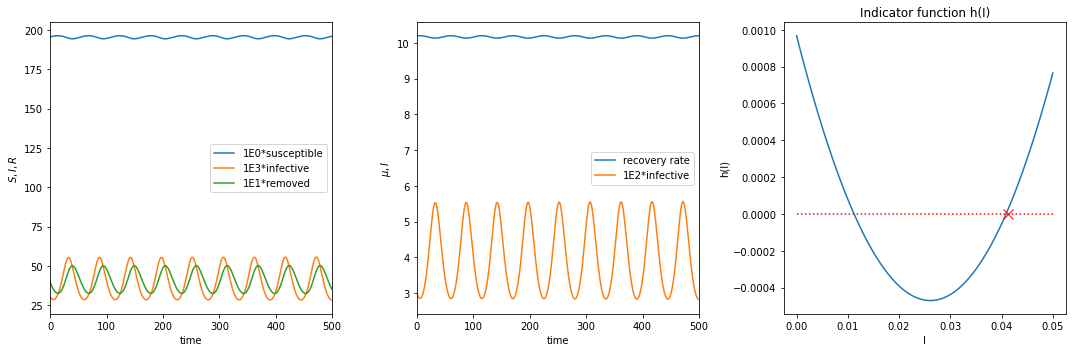

In [4]:
print(f_roots(mu0, mu1, beta, A, d, nu, 0.022))
print(h_roots(mu0, mu1, beta, A, d, nu, 0.022))

b =0.01
for i in range(20):
    hrs = np.round(h_roots(mu0, mu1, beta, A, d, nu, b),3)
    fr = np.round(f_roots(mu0, mu1, beta, A, d, nu, b),3)
    if (fr == hrs[0] or fr == hrs[1]):
        print("Hopf Bifurcation happened at " + str(np.round(b, 3)))
        SIM0 = np.array([195.7,0.03,3.92])
        sir_plots(random_state, t_0, t_end, rtol, atol, beta, A, d, nu, b, mu0, mu1, SIM0)
    
    b+=0.001
b =0.01

# SIR Trajectory 
## with Starting Point [195.3, 0.052, 4.4]
incrementing from b=0.01 to b=0.03 with increments = 0.001

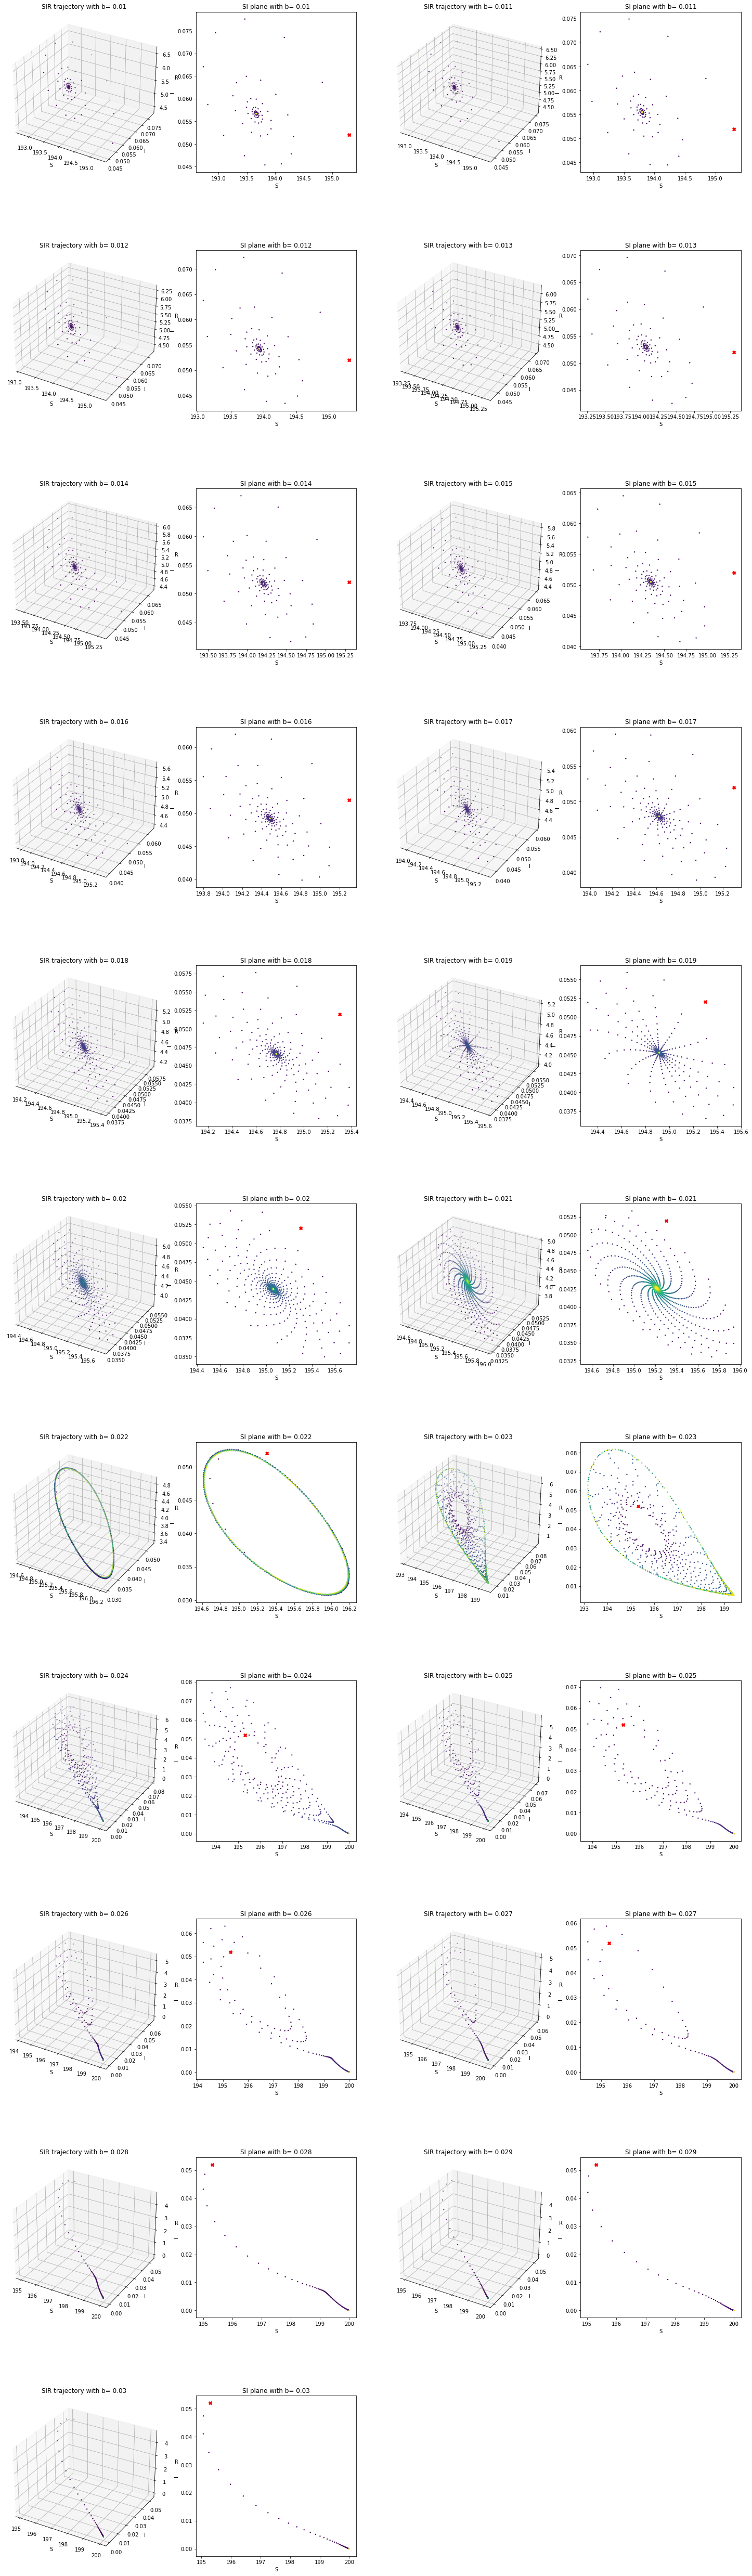

In [5]:
starting_point_1 = [195.3, 0.052, 4.4]

plot_sir_trajectory (random_state, t_0, t_end, rtol, atol, beta, A, d, nu, b, mu0, mu1, starting_point_1)

# SIR Trajectory 
## with Starting Point [195.7, 0.03, 3.92]
incrementing from b=0.01 to b=0.03 with increments = 0.001

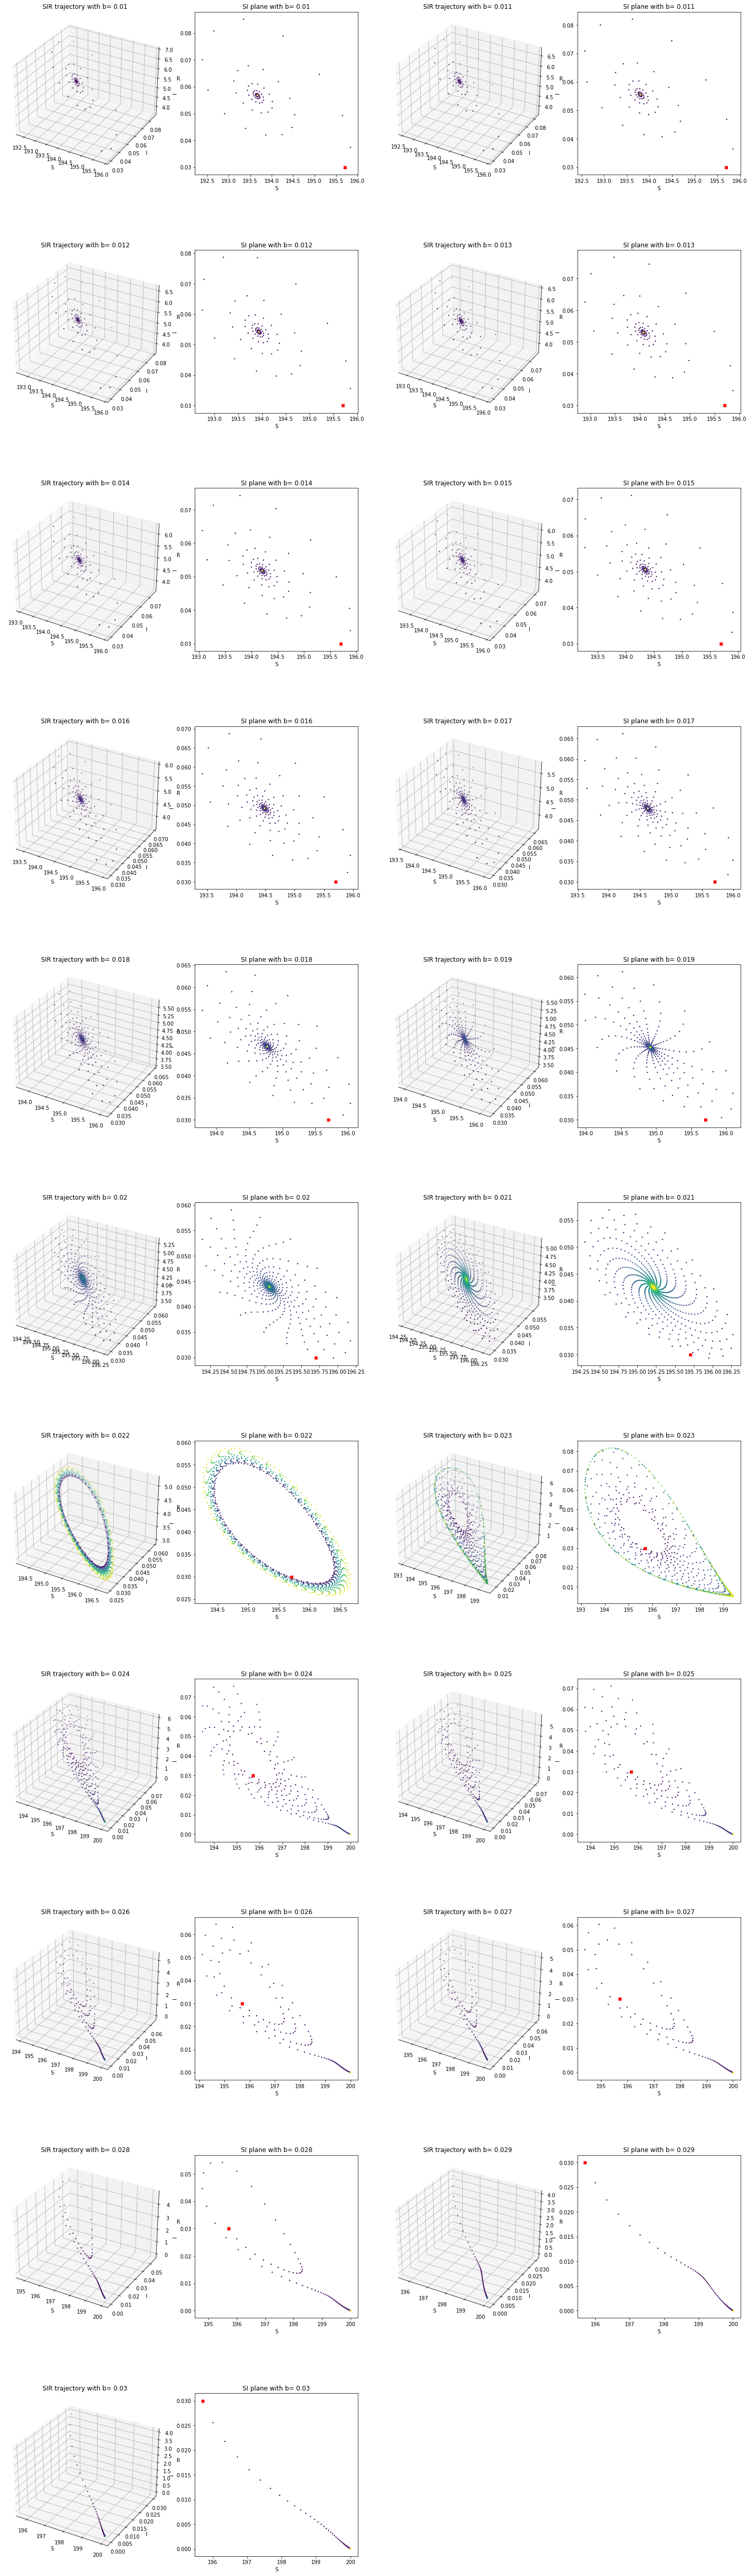

In [6]:
starting_point_2 =  [195.7, 0.03, 3.92]

plot_sir_trajectory (random_state, t_0, t_end, rtol, atol, beta, A, d, nu, b, mu0, mu1, starting_point_2)

# SIR Trajectory 
## with Starting Point [193, 0.08, 6.21] 
incrementing from b=0.01 to b=0.03 with increments = 0.001

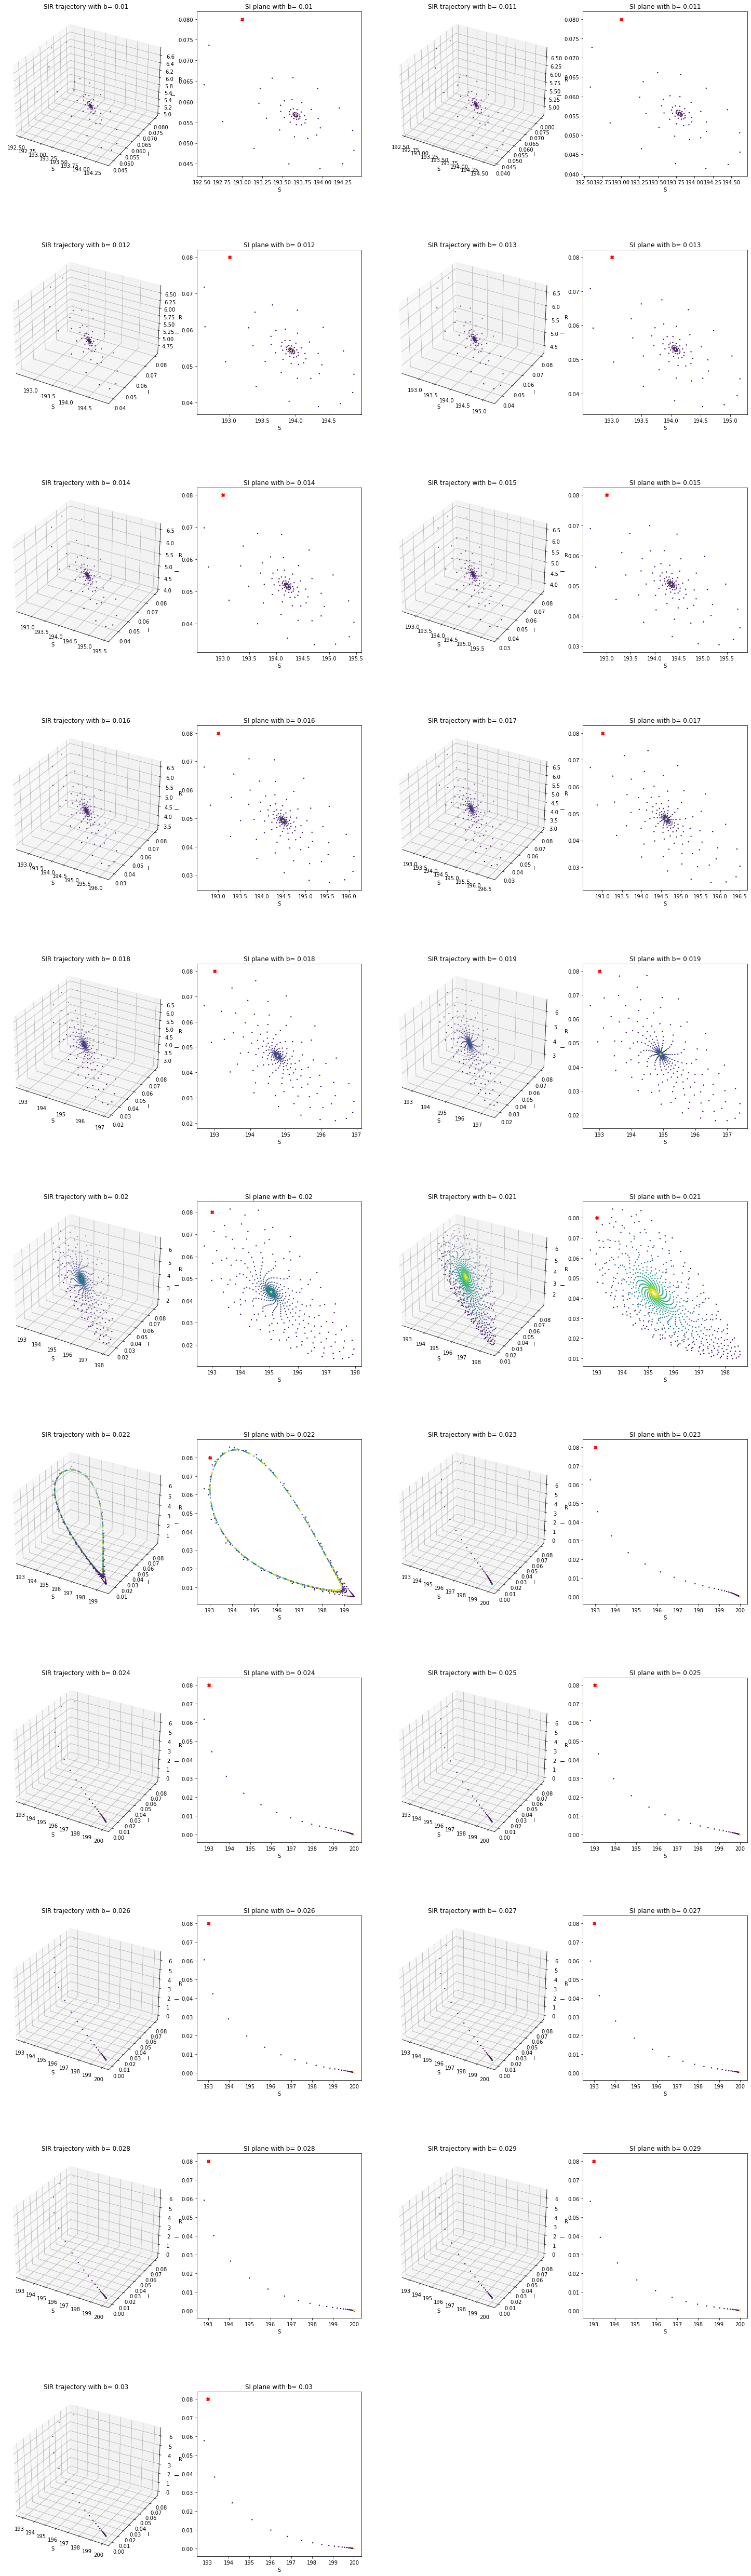

In [7]:
starting_point_3 = [193, 0.08, 6.21] 

plot_sir_trajectory (random_state, t_0, t_end, rtol, atol, beta, A, d, nu, b, mu0, mu1, starting_point_3)

Text(0.5, 1.0, 'SI plane with b: 0.022')

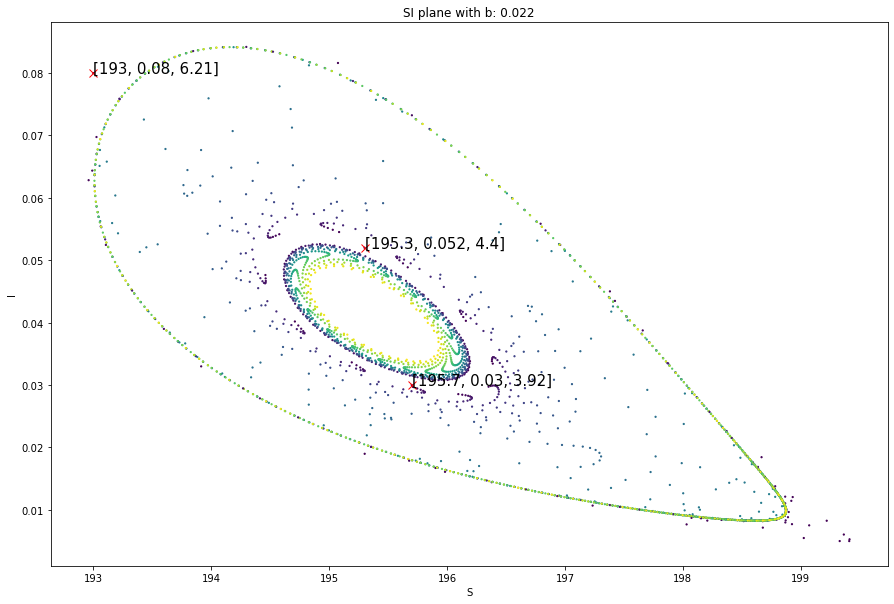

In [8]:

NT = t_end - t_0
time = np.linspace(t_0, 15000, NT)
b = 0.022


fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot()


SIM0 = [195.3, 0.052, 4.4] 
sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
ax.scatter(sol.y[0], sol.y[1], s=1.5, c=time)
ax.plot(SIM0[0], SIM0[1], marker='x', markersize = 8, linestyle='-', color='r')
ax.annotate(str(SIM0), (SIM0[0], SIM0[1]),fontsize=15)

SIM0 = [195.7, 0.03, 3.92]
sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
ax.scatter(sol.y[0], sol.y[1], s=1.5, c=time)
ax.plot(SIM0[0], SIM0[1], marker='x', markersize = 8, linestyle='-', color='r')
ax.annotate(str(SIM0), (SIM0[0], SIM0[1]),fontsize=15)

SIM0 = [193, 0.08, 6.21]
sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
ax.scatter(sol.y[0], sol.y[1], s=1.5, c=time)
ax.plot(SIM0[0], SIM0[1], marker='x', markersize = 8, linestyle='-', color='r')
ax.annotate(str(SIM0), (SIM0[0], SIM0[1]),fontsize=15)


ax.set_xlabel("S")
ax.set_ylabel("I")
ax.set_title("SI plane with b: {0}".format(np.round(b,3)))

# Different Bifurcation
For example:
Theorem 4.1. For the system (2.2), consider R0 as the bifurcation parameter.
When R0=1, system (2.2)undergoes forward bifurcation if b>A(μ1−μ0)/β(β−ν); system (2.2)un-dergoes backward bifurcation if b<A(μ1−μ0)/β(β−ν); system (2.2)undergoes pitchfork bifurcation if b=A(μ1−μ0)/β(β−ν).

In [9]:
# parameters
random_state = 12345
t_0 = 0
t_end = 1000
NT = t_end-t_0
# if these error tolerances are set too high, the solution will be qualitatively (!) wrong
rtol=1e-8
atol=1e-8

# SIR model parameters
beta=11.5
A=20
d=0.1
nu=1
b=0.01 # try to set this to 0.01, 0.020, ..., 0.022, ..., 0.03
mu0 = 10   # minimum recovery rate
mu1 = 10.4  # maximum recovery rate CHANGE TO MAKE R0 = 1

Reproduction number R0= 1.0
Globally asymptotically stable if beta <=d+nu+mu0. This is False


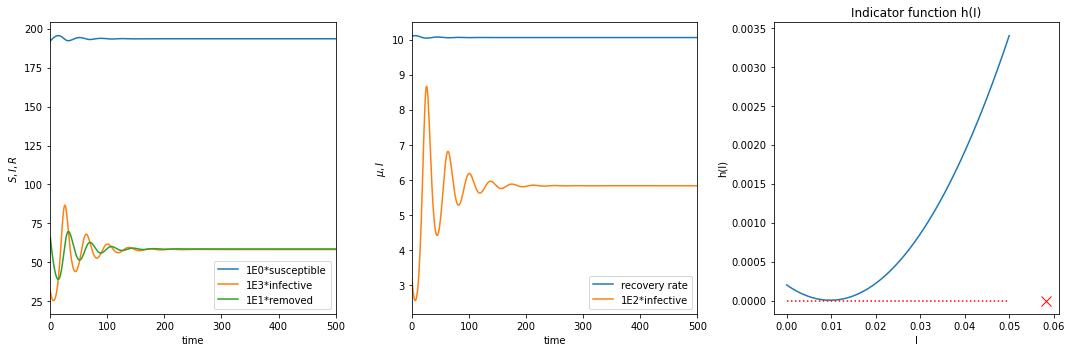

In [10]:
rng = np.random.default_rng(random_state)
SIM0 = rng.uniform(low=(190, 0, 1), high=(199, 0.1, 8), size=(3,))
sir_plots(random_state, t_0, t_end, rtol, atol, beta, A, d, nu, b, mu0, mu1, SIM0)

In [11]:
A*(mu1-mu0)/(beta*(beta-nu))


0.06625258799171849